
# 02. Librería Numpy. Operaciones avanzadas

#### Contenidos:

* [Vectorización y Broadcasting](#Vectorización-y-Broadcasting)
* [Manipulación de arrays: Indexación y indexación "fancy"](#Manipulación-de-arrays:-Indexación-y-indexación-"fancy")



Una de las razones que hacen que `numpy` sea uno de los paquetes más utilizados para el cálculo numérico es su manejo de las operaciones vectorizadas. 

En este notebook vamos a estudiar la vectorización, cómo operar con vectores de formas distintas (*broadcasting*) y varias formas de indexación. 

In [ ]:
import numpy as np

# Vectorización y Broadcasting

Numpy no solo nos facilita la tarea de trabajar con matrices y vectores mediante los arrays. Dos de sus conceptos claves son la *vectorización* y el *broadcasting*

## Vectorización y funciones universales

Aunque lo hemos avanzado brevemente anteriormente, la **vectorización** permite que las operaciones aritméticas cuando trabajamos con array se realicen implícitamente **elemento a elemento**, y por lo tanto hay una **ausencia de iteraciones explícitas y de indexación**. Es decir, no necesitamos bucles para realizar la mayoría de operaciones con arrays.

La vectorización tiene muchas ventajas:

In [ ]:
a = np.array([3, 4.3, 1])
b = np.array([-1, 0, 3.4])

# Producto elemento por elemento
c = a * b
c

Para dar soporte a la vectorización, numpy reimplementa funciones matemáticas como **funciones universales**, que son aquellas que funcionan tanto para escalares como para arrays

In [ ]:
import math

# La función sin de math no nos permite trabajar con vectores de numpy
math.sin(a)

In [ ]:
# La función sin de numpy, obtiene el seno para cada elemento del array
np.sin(a)

In [ ]:
# Y también funciona para simples escalares
np.sin(0)

Por tanto, podemos prácticamente eliminar la mayoría de bucles de nuestro código. Y es importante hacerlo para hacer que el código sea eficiente.

Vamos con algún ejemplo más.

In [ ]:
# Definimos una matriz
matriz = np.array([[1, 2, 3], [4, 5, 6]])
# Definimos otra matriz
matriz2 = np.array([[1, 1, 2], [1, 2, 2,]])

print("matriz \n", matriz)
print("matriz 2 \n",  matriz2)

In [ ]:
# Podemos hacer cualquier operación aritmética elemento por elemento (si coinciden las dimensiones)
matriz + matriz2

In [ ]:
matriz - matriz2

In [ ]:
matriz * matriz2

In [ ]:
matriz / matriz2

In [ ]:
matriz ** matriz2

## Broadcasting


El **broadcasting** (*difusión*) es el otro concepto importante en Numpy. Describe el **comportamiento de las operaciones con arrays de distinta forma**. Con ciertas restricciones, se trata de que el array de menores dimensiones se "difunde" al más grande, siempre que tengan formas compatibles.

En Numpy todas las operaciones adoptan por defecto un comportamiento de este tipo (no sólo las operaciones
aritméticas sino las lógicas, las funcionales y las de nivel de bits)

La forma más obvia de observar el broadcasting es cuando se opera un array con un escalar.

In [ ]:
a = np.array([1., 2., 3.])
b = 2.

# Todos los elementos de a se multiplican por 2
a * b

Podemos interpretar que el escalar  `b` es un array adimensional que "se estira" para ser compatible con las dimensiones de `a`

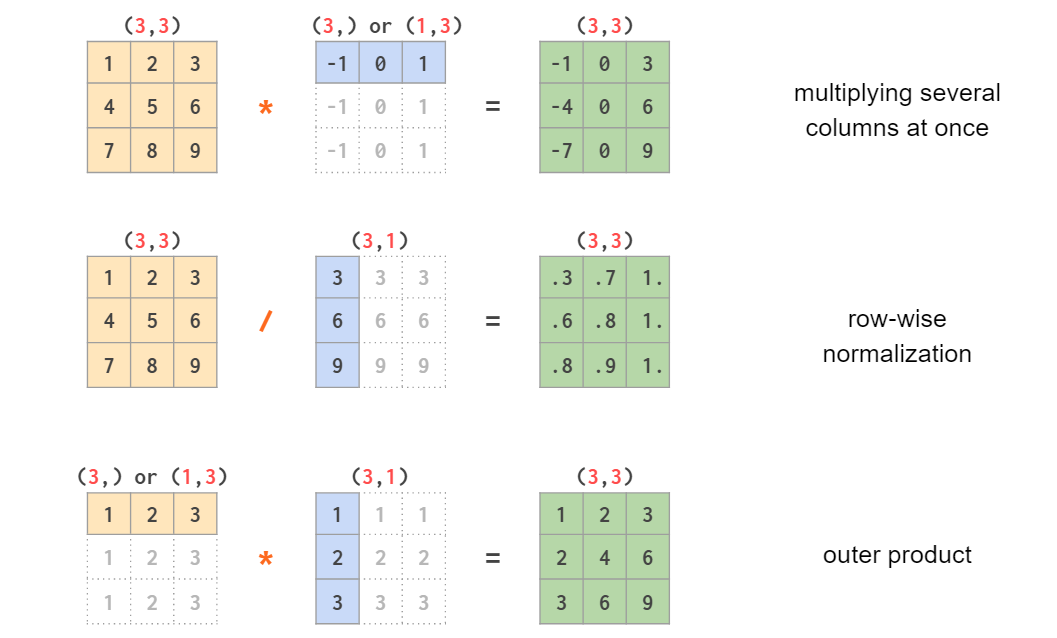

#### Regla general del broadcasting

       Dos arrays son compatibles para operar via *broadcasting* si sus dimensiones 
       (de atrás hacia adelante) son iguales o alguna es 1. 


En otras palabras:

      Debe cumplirse que el `shape` de uno sea "sufijo" del `shape` del otro array (1 es comodin) 


In [ ]:
matriz = np.array([[1, 2, 3], [4, 5, 6]])
matriz

In [ ]:
matriz+1

In [ ]:
matriz*2

In [ ]:
matriz / 2.0

In [ ]:
matriz **2

Por tanto, el broadcasting también funciona cuando tenemos una matriz y un vector compatibles.

In [ ]:
a = np.array([[ 0.0, 0.0, 0.0],
              [10.0, 10.0, 10.0],
              [20.0, 20.0, 20.0],
              [30.0, 30.0, 30.0]])

b = np.array([1.0, 2.0, 3.0])

a.shape, b.shape   # son compatibles para broadcasting

In [ ]:
a + b

In [ ]:
a = np.array([0.0, 10.0, 20.0, 30.0])
b = np.array([1.0, 2.0, 3.0])

# Fallará ya que las dimensiones no son compatibles!
a + b

Pero podemos elevar la dimensionalidad de `a` (agregar una dimensión sin cambiar los elementos) para poder operar entre los dos arrays

In [ ]:
a =  a.reshape((4,1))   # equivalente a  a[:,np.newaxis]
b = np.array([0.0, 1.0, 2.0])
a.shape, b.shape

In [ ]:
a + b

### Por qué debemos tratar de crear código vectorizado y hacer uso del broadcasting
* El código vectorizado es más conciso y fácil de leer.
* Menos líneas de código habitualmente implican menos errores.
* El código se parece más a la notación matemática estándar (por lo que es más fácil,
por lo general, corregir código asociado a construcciones matemáticas)
* La vectorización redunda en un código más "pythónico"
* Suele ser mucho más rápido y eficiente

# Manipulación de arrays: Indexación y indexación "fancy"

## Indexación

Trabajamos con los siguientes arrays de ejemplo.

In [ ]:
v = np.array([1,2,3,4])
v

In [ ]:
M = np.random.rand(3,3)
M

Para acceder a los elementos de un array simplemente debemos usar los índices entre corchetes.

In [ ]:
# v es un vector que solo tiene una dimensión, por lo que solo requiere de un índice
v[0]

In [ ]:
# M es una matriz, o un array de 2 dimensiones, por lo que necesita dos índices para acceder al elemento correspondiente (fila,columna)
M[1,1]

Si omitimos algún índice en un array multidimensional, nos devolverá toda la fila (o, en general, un array con una dimensión menos)

In [ ]:
M

In [ ]:
# La fila 1 (es la segunda porque la indexación comienza en 0)
M[1]

Ocurre lo mismo si utilizamos `:` como comodín para indicar que queremos seleccionar todas las columnas (podemos hacer lo mismo para seleccionar todas las filas de una columna)

In [ ]:
M[1,:] # fila 1

In [ ]:
M[:,1] # columna 1

Los arrays son mutables y por tanto podemos asignar nuevos valores a los elementos de un array usando la indexación.

In [ ]:
M[0,0] = 1

In [ ]:
M

In [ ]:
# También funciona para poder dar valores a toda una fila o columna
M[1,:] = 0
M[:,2] = -1

In [ ]:
M

### Index slicing

Index slicing es el nombre técnico para la sintáxis de la forma `M[lower:upper:step]` para extraer parte de un array, y funciona de la misma forma que con las listas de Python.

In [ ]:
A = np.array([1,2,3,4,5])
A

In [ ]:
# Obtenemos los elementos de las posición 1 a la 3, sin incluir este último
A[1:3]

¡Cuidado! Los "slices" son *mutables* y se conocen como vistas del array original. Eso quiere decir que si cambiamos un elemento del "slice" también lo cambiamos en el array original.

In [ ]:
A[1:3] = [-2,-3]
A

In [ ]:
aux = A[1:3]
aux

In [ ]:
aux[0] = 20 # Cuidado!! Modificamos A también!
aux

In [ ]:
A

In [ ]:
B = A[3:5]
B

In [ ]:
B[0] = -10 # Cambiamos el elemento 0 de B, y a su vez el 3 de A!!!
A, B

Podemos omitir cualquiera de los tres parámetros en  `M[lower:upper:step]`.

In [ ]:
A[::] # lower, upper, step cogen su valor por defecto

In [ ]:
A[::2] # step es 2 (por tanto el paso es 2), lower y upper toman sus valores por defecto al inicio y final del array

In [ ]:
A[:3] # primeros tres elementos

In [ ]:
A[3:] # elementos a partir del índice 3

Al igual que con las listas, los índices negativos cuentan desde el final del array (los positivos desde el inicio).

In [ ]:
A = np.array([1,2,3,4,5])

In [ ]:
A[-1] # último elemento en el array

In [ ]:
A[-3:] # los tres últimos elementos

El index slicing funciona de la misma forma para arrays multidimensionales.

In [ ]:
# Creamos un array
A = np.array([[n+m*10 for n in range(5)] for m in range(5)])

A

In [ ]:
# Una parte del array original
A[1:4, 1:4]

In [ ]:
# Filas o columnas pares
A[::2, ::2]

### Fancy indexing

Fancy indexing es el nombre que se le da a cuando utilizamos un array o lista en el lugar de los índices.

In [1]:
a = np.random.randint(0, 31, 10)   # 10 enteros aleatorios entre [0, 30]
a

NameError: name 'np' is not defined

In [ ]:
a[[1, 2, 4, 1]]    # selecciona el elemento 1, 2, el 4 y  de nuevo el 1

In [ ]:
# Podemos elegir las filas que queramos de nuestra matriz
indices_filas = [1, 2, 4]
A[indices_filas]

In [ ]:
indices_cols = [1, 2, -1] # recordad que -1 significa el último elemento
# Obtenemos los elementos en cada posición indicada por indices_filas e indices_cols
A[indices_filas, indices_cols]

También podemos utilizar máscaras para seleccionar filas, columnas o elementos.

Una máscara es un array de valores booleanos (que pueden tomar el valor True o False). Cuando aplicamos una máscara al array, se seleccionarán aquellos elementos que en la máscara tengan su valor a True.

In [ ]:
B = np.array([n for n in range(5)])
B

In [ ]:
mascara = np.array([True, False, True, False, False])
# Cogemos el primer y tercer elemento
B[mascara]

In [ ]:
# Equivalente a lo anterior pero creando un array indicando el tipo
mascara = np.array([1,0,1,0,0], dtype=bool)
B[mascara]

Esta característica es muy útil para seleccionar elementos de un array de manera condicional.

In [ ]:
x = np.arange(0, 10, 0.5)
x

In [ ]:
# Creamos una máscara para seleccionar los valores mayores que 5 y menores que 7.5
mask = (x > 5) & (x < 7.5)

mask

In [ ]:
# Seleccionamos los valores que cumplen la condición
x[mask]

In [ ]:
# Podemos hacerlo directamente 
x[(x > 5) & (x < 7.5)]


Si en vez de los valores que cumplen una condición, queremos las posiciones, podemos usar la función `where`

In [ ]:
np.where(a > 15)     # devuelve las posiciones.

Además, la función where funciona como estructura ternaria a nivel arrays

In [ ]:
b = 0
print(a)
# para cada i-elemento a[i] si True, si no b[i] (o constante)
np.where(a > 10, a, b)   